# Working with Outliers

* An outlier is a data point that is significantly different from the remaining data. Statisticalparameters such as the mean and variance are sensitive to outliers. Outliers may also affectthe performance of some machine learning models

    1. Identification of Outliers.
        * 1.1. Box plot
        * 1.2. IQR
        * 1.3. Z score
        
    2. Handling of OUtliers.
        * 2.1 Trimming or Truncating Outliers
        * 2.2 Performing winsorization
        

In [1]:
# IMPORTING LIBRARARIES
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data set
tr= pd.read_csv(r'file:///E:\Users\Raviteja\Downloads\EDA%20class\Dataset%20for%20eda%2024sep\data1\Travel.csv')

In [3]:
tr.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
tr.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [6]:
#extracting category columns
[fea for fea in tr.columns if tr[fea].dtype == 'O']

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [7]:
#extracting numerical columns
[fea for fea in tr.columns if tr[fea].dtype != 'O']

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [8]:
cat_col = [fea for fea in tr.columns if tr[fea].dtype == 'O']
num_col = [fea for fea in tr.columns if tr[fea].dtype != 'O']

# 1.1 Box Plot
* It captures the visualized summary of the data effectively and efficiently with only a simple box and whiskers. Values outside whiskers denote ouliers. 

<AxesSubplot:xlabel='NumberOfChildrenVisiting'>

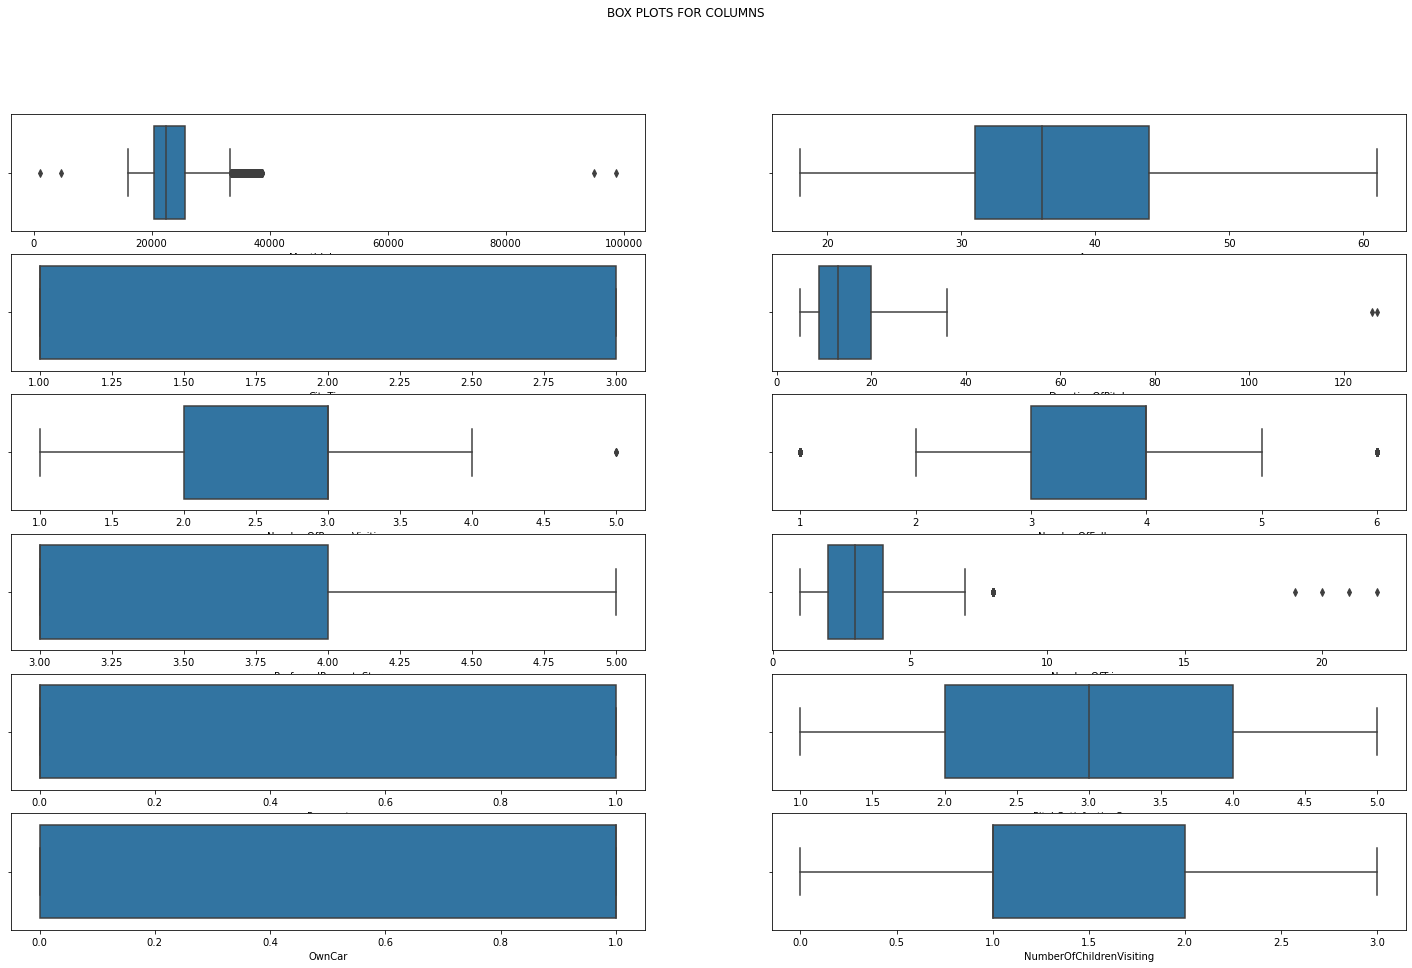

In [9]:
#iDENTIFYING OUTLIERS BY PLOTTING BOX PLOT
fig, axes = plt.subplots(6, 2, figsize=(25, 15))

fig.suptitle('BOX PLOTS FOR COLUMNS')

sns.boxplot(ax=axes[0, 0],  x=tr['MonthlyIncome'])
sns.boxplot(ax=axes[0, 1],  x=tr['Age'] )
sns.boxplot(ax=axes[1, 0],  x=tr['CityTier'] )
sns.boxplot(ax=axes[1, 1],  x=tr['DurationOfPitch'] )
sns.boxplot(ax=axes[2, 0],  x=tr['NumberOfPersonVisiting'] )
sns.boxplot(ax=axes[2, 1],  x=tr['NumberOfFollowups'])
sns.boxplot(ax=axes[3, 0],  x=tr['PreferredPropertyStar'])
sns.boxplot(ax=axes[3, 1],  x=tr['NumberOfTrips'])
sns.boxplot(ax=axes[4, 0],  x=tr['Passport'])
sns.boxplot(ax=axes[4, 1],  x=tr['PitchSatisfactionScore'])
sns.boxplot(ax=axes[5, 0],  x=tr['OwnCar'])
sns.boxplot(ax=axes[5, 1],  x=tr['NumberOfChildrenVisiting'])


<AxesSubplot:xlabel='NumberOfTrips'>

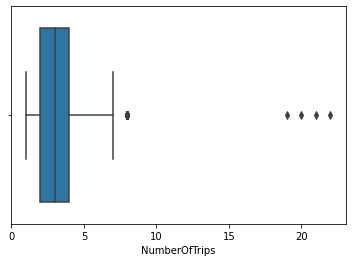

In [10]:
sns.boxplot(x=tr['NumberOfTrips'])

* Observation: In the above box plot we cn clearly visualise Outlier values aroun 20.

# 1.2 IQR (Inter Quartile Range)

* IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach.

In [11]:
#Finding IQR


Q1 = tr['MonthlyIncome'].quantile(0.25)
                    
Q3 = tr['MonthlyIncome'].quantile(0.75)

IQR = Q3 - Q1

Q1,  Q3, IQR

(20346.0, 25571.0, 5225.0)

In [12]:
#CAlculating upper limit and lower limit
upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)

upper_limit, lower_limit

(33408.5, 12508.5)

In [13]:
#Finding OUTLIERS at lower range
lower_outlier = tr[tr['MonthlyIncome']<lower_limit]

lower_outlier

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2586,202586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


In [14]:
#Finding OUTLIERS at UPPER range
upper_outlier = tr[tr['MonthlyIncome']>upper_limit]

upper_outlier

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
25,200025,0,53.0,Self Enquiry,1,11.0,Salaried,Female,2,3.0,King,3.0,Married,5.0,0,5,0,1.0,VP,34094.0
29,200029,0,46.0,Self Enquiry,3,8.0,Small Business,Female,2,3.0,King,5.0,Single,4.0,0,2,0,1.0,VP,33947.0
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
45,200045,1,41.0,Self Enquiry,1,18.0,Large Business,Female,2,3.0,King,3.0,Divorced,2.0,0,4,1,0.0,VP,34545.0
62,200062,0,50.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,King,3.0,Married,6.0,1,4,1,1.0,VP,33740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,204851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4859,204859,1,51.0,Company Invited,3,19.0,Salaried,Male,3,4.0,Deluxe,3.0,Single,5.0,1,3,1,2.0,Manager,35558.0
4868,204868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0
4869,204869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,NaN,0,1,1,2.0,Executive,37865.0


# 1.3 using Z-score value to find Outliers
* Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.we can calculate the z score for each one by using the Z-score formula,

* z = (x – μ) / σ

In [15]:
mean = np.mean(tr['MonthlyIncome'])
std = np.std(tr['MonthlyIncome'])

z = (tr['MonthlyIncome']-mean)/std
z

0      -0.488252
1      -0.648657
2      -1.213700
3      -1.061473
4      -0.957572
          ...   
4883    0.549457
4884   -0.447546
4885    1.524157
4886   -0.619104
4887    0.078278
Name: MonthlyIncome, Length: 4888, dtype: float64

In [16]:
#attach a column with z-scores to the dataframe.
tr['MonthlyIncome_z_score'] = (tr['MonthlyIncome'] - mean)/std
tr.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,MonthlyIncome_z_score
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,-0.488252
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,-0.648657
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,-1.213700
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,-1.061473
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,-0.957572


In [33]:
#Creating thresold value AND IDENTIFIYING outliers


# add index numbers of outliers to list
upper_outlier_ = (tr.index[tr['MonthlyIncome_z_score']>3])
lower_outlier_ = (tr.index[tr['MonthlyIncome_z_score']<-3])

print("Index of Upper outliers in the column=", upper_outlier_ ) 
print("Index of Lower outliers in the column=", lower_outlier_ )


Index of Upper outliers in the column= Int64Index([38, 2482], dtype='int64')
Index of Lower outliers in the column= Int64Index([142, 2586], dtype='int64')


In [38]:
# Checking outlier at indexs

print("values of Upper outliers in the column=", tr['MonthlyIncome'].loc[38], tr['MonthlyIncome'].loc[2482])
print("values of Lower outliers in the column=", tr['MonthlyIncome'].loc[2586], tr['MonthlyIncome'].loc[142])

values of Upper outliers in the column= 95000.0 98678.0
values of Lower outliers in the column= 4678.0 1000.0


# 2.1 Trimming or Truncating Outliers

* Trimming, or truncating, is the process of removing observations that show outliers in one or more variables in the dataset.

<AxesSubplot:xlabel='MonthlyIncome'>

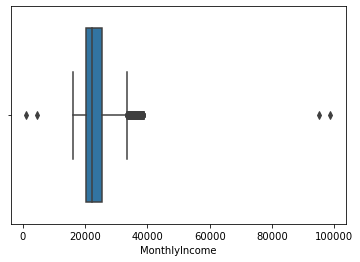

In [39]:
# Outliers in Data before trimming

sns.boxplot(x=tr['MonthlyIncome'])


In [42]:
lower_outlier

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2586,202586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


In [58]:
# Trimming

tr.drop([142, 2586], axis = 0, inplace = True)



<AxesSubplot:xlabel='MonthlyIncome'>

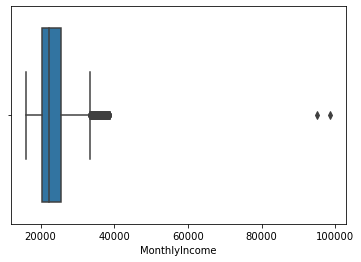

In [59]:
# NO lower Outliers in Data after trimming

sns.boxplot(x=tr['MonthlyIncome'])

# 2.2 Performing winsorization

* Winsorization, or winsorizing, is the process of transforming the data by limiting the extreme values, that is, the outliers, to a certain arbitrary value, closer to the mean of the distribution. Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values. 

In [61]:
#Define a function to winsorize a variable to arbitrary upper and lower limits:

def winsorize(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit,np.where(df[variable] < lower_limit, lower_limit,df[variable]))      

<AxesSubplot:xlabel='NumberOfTrips'>

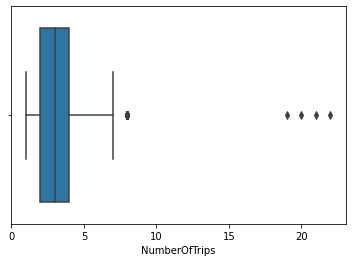

In [62]:
#Box plot of 'NumberOfTrips' Column before Winscorisation
sns.boxplot(x=tr['NumberOfTrips'])

In [63]:
#WINSCORISATION

tr['NumberOfTrips']= winsorize(tr, 'NumberOfTrips',tr['NumberOfTrips'].quantile(0.95),tr['NumberOfTrips'].quantile(0.05))

<AxesSubplot:xlabel='NumberOfTrips'>

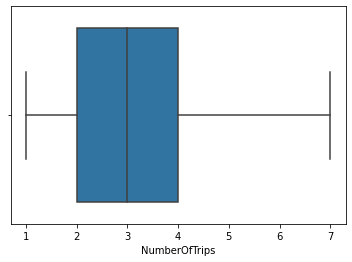

In [64]:
#Box plot of 'NumberOfTrips' Column after Winscorisation

sns.boxplot(x=tr['NumberOfTrips'])